<h2>Importing Libraries</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<h2>LOAD DATA</h2>

In [2]:
try:
    data = pd.read_csv('iris.csv')
    data.head()
except FileNotFoundError:
    print("Error: The dataset file was not found.")

<h2>EDA</h2>

In [3]:
print(data.dtypes)

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [4]:
data.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [5]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<p>There are no null values in the Iris dataset. The species is of three unique values and is the only categorical variable.</p>
<p>All the data apart from the species is of float data type.</p>
<p>There are 150 rows in the dataset</p>

In [8]:
data['Species']= data['Species'].map({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3})
data.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


<h2>Data Analysis and visualization</h2>

In [9]:
correlations = data.corr()
correlations

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


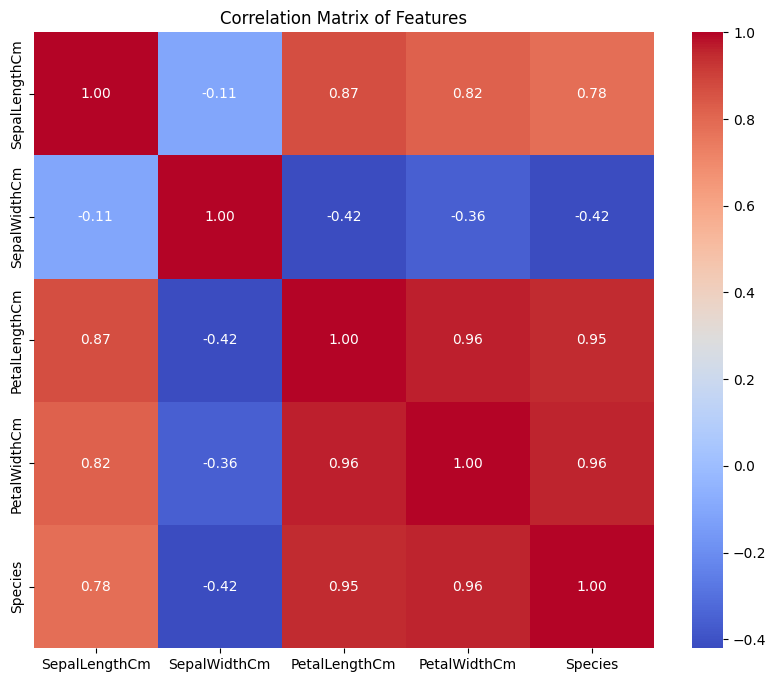

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

<p>Sepal width has the least correlation with the species, sepal length, petal width and petal length are mostly what can be used to tell what the species of the iris flower is.</p>

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

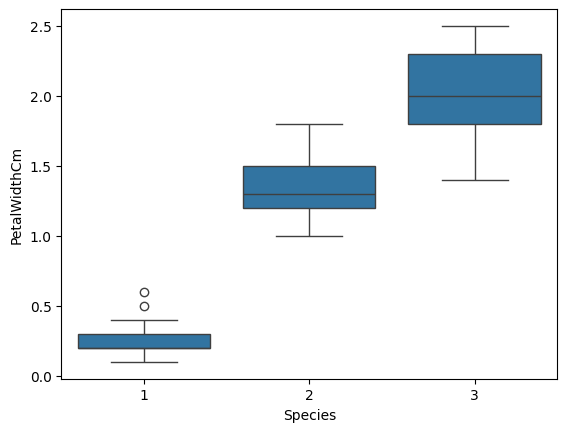

In [11]:
sns.boxplot(x='Species', y= 'PetalWidthCm', data= data )

<p>Setosa has some outliers while virginica and versicolor don't</p>

In [12]:
print("\nMean values grouped by species:")
grouped = data.groupby("Species").mean()
print(grouped)


Mean values grouped by species:
         SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                          
1                5.006         3.418          1.464         0.244
2                5.936         2.770          4.260         1.326
3                6.588         2.974          5.552         2.026


<p>Versicolor and virginica generally have higher sepal and petal sizes compared to setosa."</p>

<Figure size 1000x500 with 0 Axes>

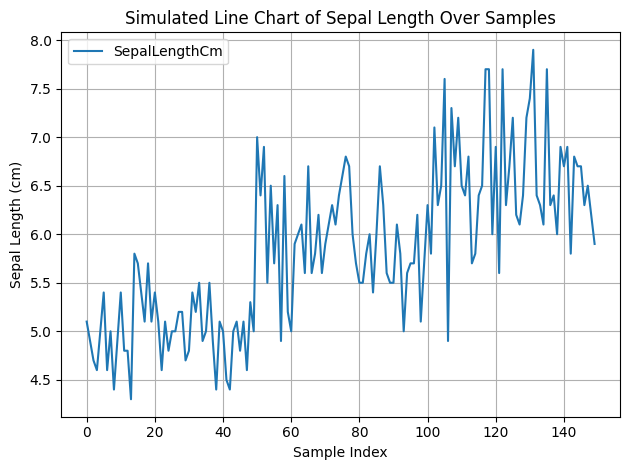

In [13]:
# 1. Line chart
plt.figure(figsize=(10, 5))
data[['SepalLengthCm']].plot(title="Simulated Line Chart of Sepal Length Over Samples")
plt.xlabel("Sample Index")
plt.ylabel("Sepal Length (cm)")
plt.grid(True)
plt.tight_layout()
plt.savefig("line_chart_sepal_length.png")
plt.show()

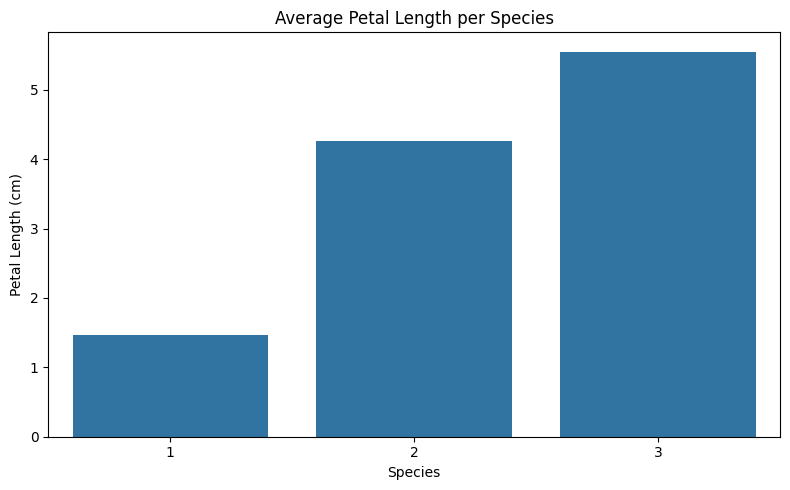

In [14]:
 # 2. Bar chart: Average petal length per species
plt.figure(figsize=(8, 5))
sns.barplot(data=data, x='Species', y='PetalLengthCm', errorbar=None) #The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.
plt.title("Average Petal Length per Species")
plt.xlabel("Species")
plt.ylabel("Petal Length (cm)")
plt.tight_layout()
plt.savefig("bar_chart_petal_length.png")
plt.show()

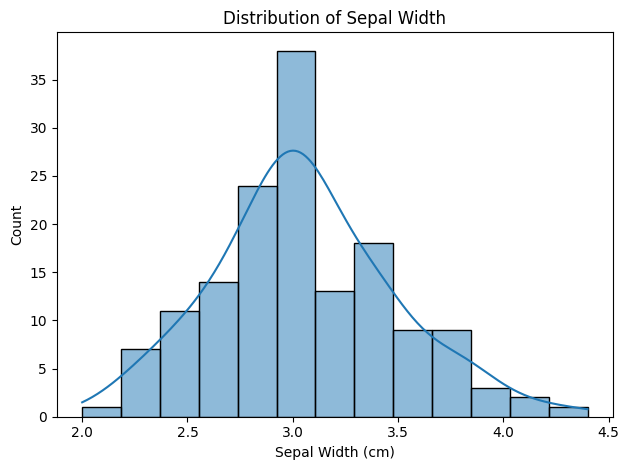

In [15]:
# 3. Histogram: Distribution of sepal widthplt.figure(figsize=(8, 5))
sns.histplot(data=data, x='SepalWidthCm', kde=True)
plt.title("Distribution of Sepal Width")
plt.xlabel("Sepal Width (cm)")
plt.tight_layout()
plt.savefig("histogram_sepal_width.png")
plt.show()

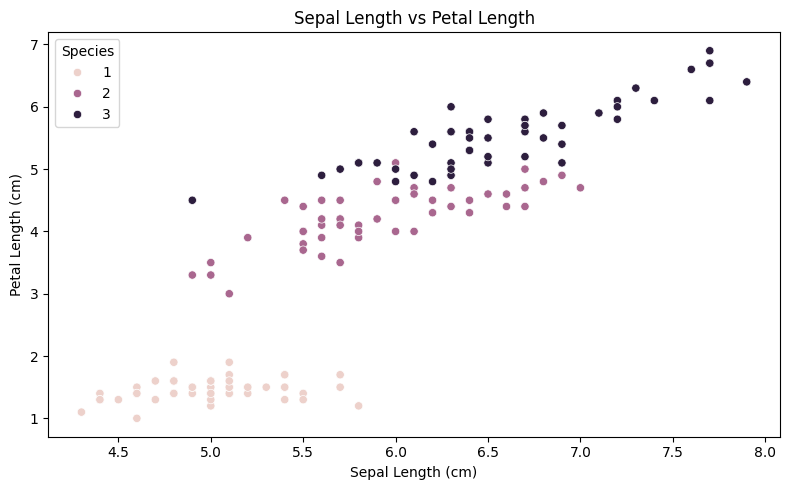

In [16]:
# 4. Scatter plot: Sepal Length vs Petal Length #
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='SepalLengthCm', y='PetalLengthCm', hue='Species')
plt.title("Sepal Length vs Petal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend(title='Species')
plt.tight_layout()
plt.savefig("scatter_plot_sepal_petal.png")
plt.show()